<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
   <br>
    <font face="Times New Roman" size=18>
    <p></p>
    In the name of God  
    </font>
    <br><br>
    <font face="Times New Roman" size=5 color=blue>
    Python for Data Mining<br>      </font>
    <font face="Times New Roman" size=4 color=blue> 
        Insurance Research Center
    </font>
    <br>
    <br>
    <font face="Times New Roman" size=4 color=#FF7500>
    Khayyam Salehi 
    </font>
    <br>       
    <font face="Times New Roman" size=3 color=#FF7500>
    Assistant Professor
    <br>
    Department of Computer science
    <br>
    Shahrekord University
    </font>
    <br>    <br>
</div>
    <hr style="border:2px solid black"> </hr>

# Support Vector Machines


# SVM - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("./data/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
len(df)

400

## Classes

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

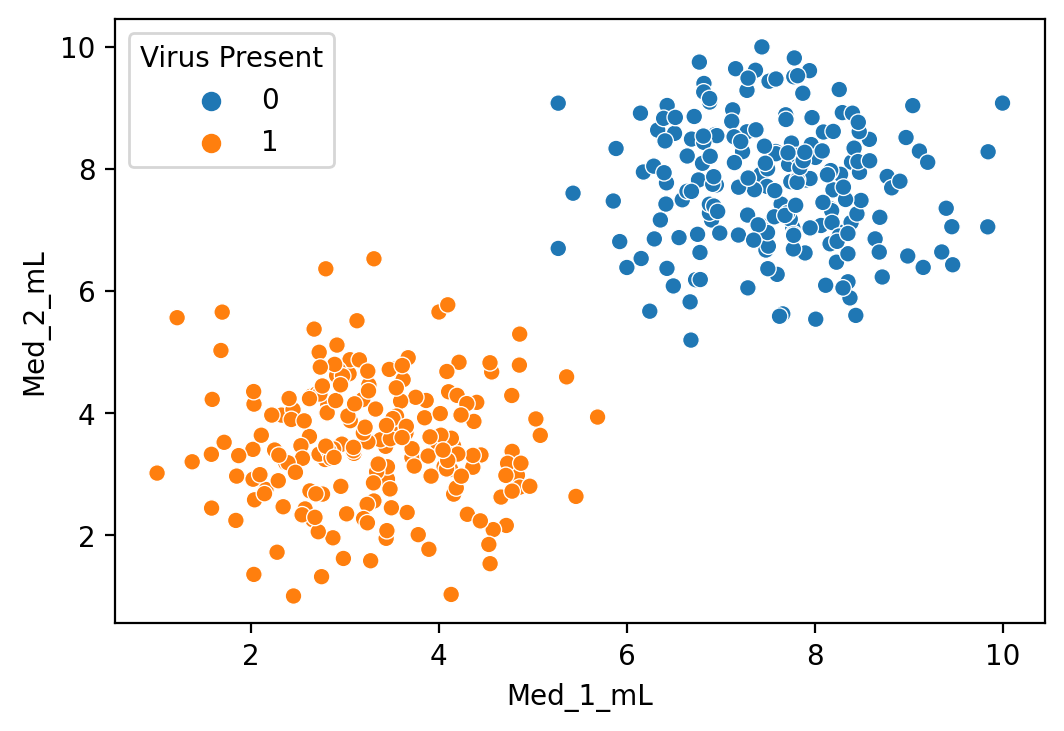

In [7]:
plt.figure(dpi= 200)
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df)

## Separating Hyperplane

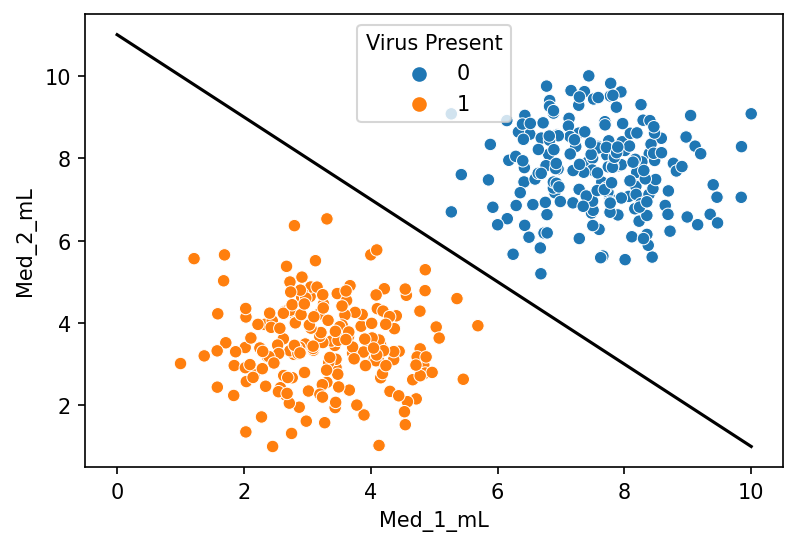

In [8]:
plt.figure(dpi = 150)
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black')

## SVM - Support Vector Machine

In [9]:
from sklearn.svm import SVC

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [11]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [12]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [13]:
# imported from .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

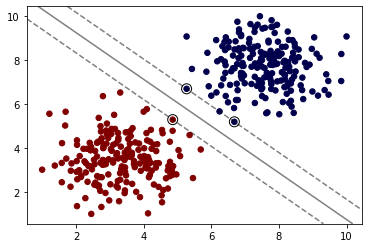

In [14]:
plot_svm_boundary(model,X,y)

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

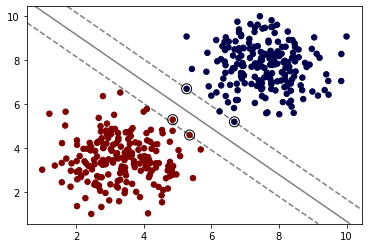

In [24]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

<img src='./figs/RBK.png'/>

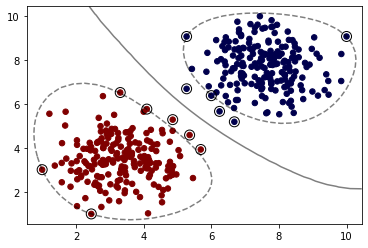

In [22]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

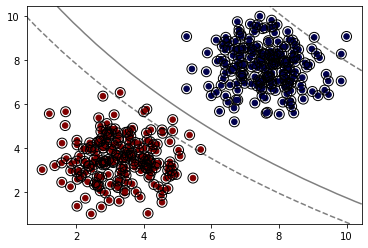

In [23]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)

*kernel function ('poly')*

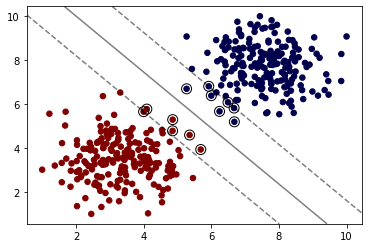

In [30]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

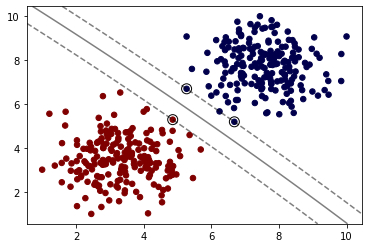

In [31]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma


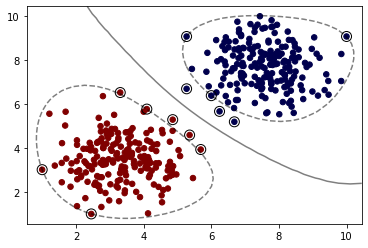

In [39]:
model = SVC(kernel='rbf', C=1,gamma=0.1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## GridSearchCV


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [47]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [48]:
grid.best_score_

1.0

In [50]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [51]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [52]:
y_pred = grid.predict(scaled_X_test)

In [53]:
accuracy_score(y_test,y_pred)

1.0

In [54]:
confusion_matrix(y_test,y_pred)

array([[63,  0],
       [ 0, 57]], dtype=int64)

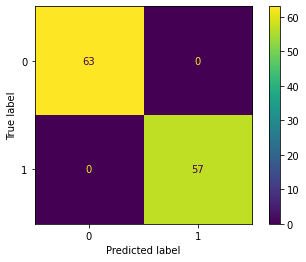

In [55]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

